In [1]:
##Data Processing and Cleaning:


import pandas as pd
# Read the CSV file
df = pd.read_csv("Saudi_Arabia_hotels.csv", names=["Hotel Name", "Address", "Score", "Number of reviews", "Price", "Room type", "Star rating", "Room view", "Swimming pool", "Restaurant", "Parking", "Wheelchair accessibility"])
df = df.drop(index=0)
df



,Hotel Name,Address,Score,Number of reviews,Price,Room type,Star rating,Room view,Swimming pool,Restaurant,Parking,Wheelchair accessibility
1,Malfa Hotel Apartments,Qal'at Bishah,8.1Scored 8.1,823 reviews,"SAR 1,250",Twin Room with Private Bathroom,NaN,yes,no,no,yes,yes
2,Intour Al Khafji Hotel,Al Khafji,7.7Scored 7.7,474 reviews,"SAR 1,465",Deluxe Room,4.0,no,no,yes,yes,no
3,Braira Al Ahsa,Al Ahsa,8.9Scored 8.9,"2,750 reviews","SAR 3,071",Classic Room,4.0,yes,yes,yes,yes,no
4,الراحة بلازا للشقق المفروشة,Sharurah,7.1Scored 7.1,96 reviews,SAR 625,Twin Room,3.0,yes,no,no,yes,no
5,Boudl Majmaa,Al Majmaah,8.1Scored 8.1,700 reviews,"SAR 1,656",Standard Room With King Bed,NaN,no,yes,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...
671,Raoum Inn Khafji Corniche,Al Khafji,8.3Scored 8.3,352 reviews,"SAR 1,489",Double or Twin Room with Side Sea View,NaN,yes,yes,yes,yes,yes
672,Ramada Hotel & Suites by Wyndham Al Qassim,Al Bukayriyah,8.9Scored 8.9,"1,352 reviews","SAR 1,743",King Room - Smoking,5.0,yes,yes,yes,yes,yes
673,Makarim Palm Hotel,Rabigh,6.9Scored 6.9,240 reviews,"SAR 1,013",One-Bedroom Apartment,NaN,yes,no,no,yes,no
674,Malfa Hotel Apartments,Qal'at Bishah,8.1Scored 8.1,823 reviews,"SAR 1,250",Twin Room with Private Bathroom,NaN,yes,no,no,yes,yes


In [2]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values:\n", missing_values)


Missing values:
 Hotel Name                    0
Address                       0
Score                         3
Number of reviews             3
Price                         0
Room type                     0
Star rating                 324
Room view                     0
Swimming pool                 0
Restaurant                    0
Parking                       0
Wheelchair accessibility      0
dtype: int64


Since there are only a few missing values for Score and Number of reviews we consider filling them in with the mean.
For the Star rating Since there are quite a few missing values for this column (324), filling them in might not be appropriate. Instead we consider that it's appropriate to replace them with NaN.

In [3]:
import numpy as np
# Convert the 'Score' column to string type
df['Score'] = df['Score'].astype(str)

# Remove "Scored" from the values in the 'Score' column
df['Score'] = df['Score'].str.replace('Scored', '')

# Split the values by space and take the first score
df['Score'] = df['Score'].str.split().str[0]

# Replace "nan" with NaN
df['Score'] = df['Score'].replace('nan', np.nan)

# Convert the 'Score' column to numeric
df['Score'] = pd.to_numeric(df['Score'])

# Calculate the mean score excluding NaN values
mean_score = df['Score'].mean()

# Replace missing values in 'Score' column with the mean
df['Score'].fillna(mean_score, inplace=True)

we find diffuculty when fiilinf the score with the mean since each score is followed by (Scored), so we replace this word with "", then we convert the values into numbers after that we calculate the mean of the socre 

In [4]:
# Convert the 'Number of reviews' column to string and then replace "( reviews)" text
df['Number of reviews'] = df['Number of reviews'].astype(str).str.replace(' reviews', '')

# Convert the 'Number of reviews' column to integer type
df['Number of reviews'] = pd.to_numeric(df['Number of reviews'], errors='coerce').fillna(0).astype(int)
# Calculate the mean number of reviews excluding NaN values
mean_reviews = df['Number of reviews'].mean()

# Replace missing values in 'Number of reviews' column with the mean
df['Number of reviews'].fillna(mean_reviews, inplace=True)

df.to_csv('mod_KSA_hotels.csv', index=False)



In [5]:
#Replace NaN values in 'Star rating' column with zero
df['Star rating'].fillna(0, inplace=True)


In [6]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values:\n", missing_values)


df.to_csv('mod_KSA_hotels.csv', index=False)


Missing values:
 Hotel Name                  0
Address                     0
Score                       0
Number of reviews           0
Price                       0
Room type                   0
Star rating                 0
Room view                   0
Swimming pool               0
Restaurant                  0
Parking                     0
Wheelchair accessibility    0
dtype: int64


Missing values were addressed and the format of 'Score' and 'Number of reviews' columns standardized. Initially, text ("Scored" and "reviews") was removed from respective columns, followed by conversion to numeric type for 'Score' and integer type for 'Number of reviews'. Missing values were then filled with the mean value of each column, excluding NaN values. These steps ensured data consistency and prepared it for analysis.

1.2 Evaluate the relevance of features and remove any irrelevant ones. 

In [7]:
    # To check if hotel is relevant with pools
    KSA_hotels = pd.read_csv('Saudi_Arabia_hotels.csv')
    pool_hotel = pd.read_excel('hotels_with_pool.xlsx')

    # Selected some features which I want to extract from KSA_hotels
    hotels = ['Hotel Name', 'Score', 'Star rating']
    
    # Renamed duplicated features with same name
    pool_hotel.rename(columns={'names': 'Hotel Name'}, inplace=True)

    # Merged the two files according to the selected features
    pool_attributes_hotel_ratings = KSA_hotels[hotels]
    hotel_pool = pd.merge(pool_attributes_hotel_ratings, pool_hotel, on='Hotel Name', how='inner')

    #Removed duplicated rows and saved it as csv file
    hotel_pool = hotel_pool.drop_duplicates()
    hotel_pool.to_csv('hotel_pool.csv', index=False)
    print(hotel_pool)

                                            Hotel Name          Score  \
0                                       Braira Al Ahsa  8.9Scored 8.9   
14                                        Boudl Majmaa  8.1Scored 8.1   
196                                    Boudl Al Jubail  8.4Scored 8.4   
197                            Warwick Al Jubail Hotel  8.6Scored 8.6   
198                             فندق كوخ الضباب النماص  7.7Scored 7.7   
...                                                ...            ...   
1776                                   Rio Hotel Olaya  8.0Scored 8.0   
1777                       فندق سافوي جدة Savoye Hotel  8.9Scored 8.9   
1778                         Crown Rose AlSahafa Hotel  7.4Scored 7.4   
1779               Rest Night Hotel Apartment- AlHamra  7.5Scored 7.5   
1780  Radisson Hotel & Apartments Dammam Industry City  7.9Scored 7.9   

      Star rating  
0             4.0  
14            NaN  
196           4.0  
197           4.0  
198           4.0  
...

In [8]:
    # To check if hotel is relevant with restaurants
    KSA_hotels = pd.read_csv('Saudi_Arabia_hotels.csv')
    restaurant_hotel = pd.read_excel('hotels_with_restaurant.xlsx')
    
    # Selected some features which I want to extract from KSA_hotels
    hotels = ['Hotel Name', 'Score', 'Star rating']
    
    # Renamed duplicated features with same name
    restaurant_hotel.rename(columns={'names': 'Hotel Name'}, inplace=True)

    # Merged the two files according to the selected features
    restaurant_hotel_ratings = KSA_hotels[hotels]
    restaurant_hotel = pd.merge(restaurant_hotel_ratings, restaurant_hotel, on='Hotel Name', how='inner')
    
    #Removed duplicated rows and saved it as csv file
    restaurant_hotel = restaurant_hotel.drop_duplicates()
    restaurant_hotel.to_csv('restaurant_hotel.csv', index=False)
    print(restaurant_hotel)

                                            Hotel Name          Score  \
0                               Intour Al Khafji Hotel  7.7Scored 7.7   
12                                      Braira Al Ahsa  8.9Scored 8.9   
23                                        Boudl Majmaa  8.1Scored 8.1   
192                           Caravan by Habitas AlUla  9.2Scored 9.2   
204                       AlMuhaidb Residence Alkhafji  8.4Scored 8.4   
...                                                ...            ...   
1802              M Hotel Al Dana Makkah by Millennium  7.9Scored 7.9   
1804                            Sama Al Qasr - Khurais  7.1Scored 7.1   
1807                          La Fontaine Jeddah Hotel  7.3Scored 7.3   
1809                         Crown Rose AlSahafa Hotel  7.4Scored 7.4   
1810  Radisson Hotel & Apartments Dammam Industry City  7.9Scored 7.9   

      Star rating  
0             4.0  
12            4.0  
23            NaN  
192           5.0  
204           NaN  
...

In [9]:
    # To check if hotel is relevant with parking
    KSA_hotels = pd.read_csv('Saudi_Arabia_hotels.csv')
    parking_hotel = pd.read_excel('hotels_with_parking.xlsx')
    
    # Selected some features which I want to extract from KSA_hotels
    hotels = ['Hotel Name', 'Score', 'Star rating']
    
    # Renamed duplicated features with same name
    parking_hotel.rename(columns={'names': 'Hotel Name'}, inplace=True)

    # Merged the two files according to the selected features
    parking_hotel_ratings = KSA_hotels[hotels]
    parking_hotel = pd.merge(parking_hotel_ratings, parking_hotel, on='Hotel Name', how='inner')

    #Removed duplicated rows and saved it as csv file
    parking_hotel = parking_hotel.drop_duplicates()
    parking_hotel.to_csv('parking_hotel.csv', index=False)
    print(parking_hotel)

                                          Hotel Name          Score  \
0                             Malfa Hotel Apartments  8.1Scored 8.1   
16                            Intour Al Khafji Hotel  7.7Scored 7.7   
24                                    Braira Al Ahsa  8.9Scored 8.9   
31                       الراحة بلازا للشقق المفروشة  7.1Scored 7.1   
32                                      Boudl Majmaa  8.1Scored 8.1   
...                                              ...            ...   
1468                                     Aster Hotel  7.5Scored 7.5   
1469  Holiday Inn Al Khobar - Corniche, an IHG Hotel  7.2Scored 7.2   
1470                     Courtyard by Marriott Jazan  8.5Scored 8.5   
1471                 Lotaz Hotel Suites - Al Salamah  9.1Scored 9.1   
1472                           Novotel Jeddah Tahlia  7.6Scored 7.6   

      Star rating  
0             NaN  
16            4.0  
24            4.0  
31            3.0  
32            NaN  
...           ...  
1468   

In [10]:
    # To check if hotel is relevant with wheelchair
    KSA_hotels = pd.read_csv('Saudi_Arabia_hotels.csv')
    wheelchair_hotel = pd.read_excel('hotels_with_wheelchair.xlsx')
    
    # Selected some features which I want to extract from KSA_hotels
    hotels = ['Hotel Name', 'Score', 'Star rating']
    
    # Renamed duplicated features with same name
    wheelchair_hotel.rename(columns={'names': 'Hotel Name'}, inplace=True)

    # Merged the two files according to the selected features
    wheelchair_hotel_ratings = KSA_hotels[hotels]
    wheelchair_hotel = pd.merge(wheelchair_hotel_ratings, wheelchair_hotel, on='Hotel Name', how='inner')
    
    #Removed duplicated rows and saved it as csv file
    wheelchair_hotel = wheelchair_hotel.drop_duplicates()
    wheelchair_hotel.to_csv('wheelchair_hotel.csv', index=False)
    print(wheelchair_hotel)

                            Hotel Name          Score  Star rating
0               Malfa Hotel Apartments  8.1Scored 8.1          NaN
16                      فندق نوفا بارك  9.2Scored 9.2          NaN
17                       Boudl Al Rass  8.7Scored 8.7          NaN
20              Lily Hotel Suite Hofuf  8.4Scored 8.4          NaN
42                 اقامة بلس ميرا هاوس  7.7Scored 7.7          3.0
...                                ...            ...          ...
1710  Residence Inn by Marriott Dammam  9.0Scored 9.0          4.0
1711      Courtyard by Marriott Jubail  8.6Scored 8.6          4.0
1712            Mövenpick Hotel Jeddah  7.6Scored 7.6          4.0
1713      Novotel Dammam Business Park  7.3Scored 7.3          4.0
1715   Traveller Inn Hotel Appartments  7.4Scored 7.4          NaN

[78 rows x 3 columns]


In [11]:
# We noticed that the scores and star rating are not correlated to each other. Star ratings have many missing values. 
# Scores are the ratings given by the users themselves, therefore we chose to keep the scores and remove ratings

# We dropped 'Star rating' column as it was irrelevant to our project goal
#KSA_hotels = pd.read_csv('Saudi_Arabia_hotels.csv')
#column_to_drop = 'Star rating' 
#KSA_hotels.drop(columns=[column_to_drop], inplace=True)

#KSA_hotels.to_csv('mod_KSA_hotels.csv', index=False)
#print(KSA_hotels)

In [12]:
########## you have to write documantation about what you did in 1.2 ###########

3.1 Data Processing 
first we decide to convert the price into int so that we can use it in the statistical measures

In [13]:
# Convert the 'Price' column to string type
#df['Price'] = df['Price'].astype(str)

# Remove special characters and non-numeric characters from the 'Price' column
#df['Price'] = df['Price'].str.replace('SAR', '').str.replace(',', '').str.replace('Â', '').str.strip()

# Convert the 'Price' column to numeric
#df['Price'] = pd.to_numeric(df['Price'])

# Check the data type of the 'Price' column after conversion
#print("Data type of 'Price' column after conversion:", df['Price'].dtype)

#df.to_csv('mod_KSA_hotels.csv', index=False)

In [14]:
import pandas as pd

# Read the CSV file
KSA_hotels = pd.read_csv('mod_KSA_hotels.csv')

# Convert 'Score' column to string type if not already
KSA_hotels['Score'] = KSA_hotels['Score'].astype(str)

# Preprocessing 'Score' column by removing irrelevant part of values and turning them into float 
KSA_hotels['Score'] = KSA_hotels['Score'].str.slice(9)
KSA_hotels['Score'] = KSA_hotels['Score'].replace('', '0')  # Replace empty strings with '0'
KSA_hotels['Score'] = KSA_hotels['Score'].astype(float)

# Convert 'Number of reviews' column to string type if not already
KSA_hotels['Number of reviews'] = KSA_hotels['Number of reviews'].astype(str)

# Preprocessing 'Number of reviews' column by removing irrelevant part of values and turning them into int 
KSA_hotels['Number of reviews'] = KSA_hotels['Number of reviews'].str.slice(stop=-7).str.replace(',', '')
KSA_hotels['Number of reviews'] = KSA_hotels['Number of reviews'].replace('', pd.NA)  # Replace empty strings with NaN
KSA_hotels['Number of reviews'] = KSA_hotels['Number of reviews'].fillna('0')  # Fill NaN values with '0'
KSA_hotels['Number of reviews'] = KSA_hotels['Number of reviews'].astype(int)

# Convert 'Price' column to string type if not already
KSA_hotels['Price'] = KSA_hotels['Price'].astype(str)

# Preprocessing 'Price' column by removing irrelevant part of values and turning them into int
KSA_hotels['Price'] = KSA_hotels['Price'].str.slice(3).str.replace(',','')
KSA_hotels['Price'] = KSA_hotels['Price'].replace('', pd.NA)  # Replace empty strings with NaN
KSA_hotels['Price'] = KSA_hotels['Price'].fillna('0')  # Fill NaN values with '0'
KSA_hotels['Price'] = KSA_hotels['Price'].astype(int)



KSA_hotels.to_csv('mod_KSA_hotels.csv', index=False)
print(KSA_hotels)


                                     Hotel Name        Address  Score  \
0                        Malfa Hotel Apartments  Qal'at Bishah    0.0   
1                        Intour Al Khafji Hotel      Al Khafji    0.0   
2                                Braira Al Ahsa        Al Ahsa    0.0   
3                   الراحة بلازا للشقق المفروشة       Sharurah    0.0   
4                                  Boudl Majmaa     Al Majmaah    0.0   
..                                          ...            ...    ...   
670                   Raoum Inn Khafji Corniche      Al Khafji    0.0   
671  Ramada Hotel & Suites by Wyndham Al Qassim  Al Bukayriyah    0.0   
672                          Makarim Palm Hotel         Rabigh    0.0   
673                      Malfa Hotel Apartments  Qal'at Bishah    0.0   
674                      Intour Al Khafji Hotel      Al Khafji    0.0   

     Number of reviews  Price                               Room type  \
0                    0   1250         Twin Room wi

In [15]:
# Preprocessing 'Room view', 'Swimming pool', 'Restaurant', 'Parking', 'Wheelchair accessibility' by encoding them into 0s and 1s
KSA_hotels = pd.read_csv("mod_KSA_hotels.csv")

KSA_hotels['Room view'] = KSA_hotels['Room view'].str.lower().replace({'yes': 1, 'no': 0})
KSA_hotels['Swimming pool'] = KSA_hotels['Swimming pool'].str.lower().replace({'yes': 1, 'no': 0})
KSA_hotels['Restaurant'] = KSA_hotels['Restaurant'].str.lower().replace({'yes': 1, 'no': 0})
KSA_hotels['Parking'] = KSA_hotels['Parking'].str.lower().replace({'yes': 1, 'no': 0})
KSA_hotels['Wheelchair accessibility'] = KSA_hotels['Wheelchair accessibility'].str.lower().replace({'yes': 1, 'no': 0})

KSA_hotels.to_csv('mod_KSA_hotels.csv', index=False)
print(KSA_hotels)

                                     Hotel Name        Address  Score  \
0                        Malfa Hotel Apartments  Qal'at Bishah    0.0   
1                        Intour Al Khafji Hotel      Al Khafji    0.0   
2                                Braira Al Ahsa        Al Ahsa    0.0   
3                   الراحة بلازا للشقق المفروشة       Sharurah    0.0   
4                                  Boudl Majmaa     Al Majmaah    0.0   
..                                          ...            ...    ...   
670                   Raoum Inn Khafji Corniche      Al Khafji    0.0   
671  Ramada Hotel & Suites by Wyndham Al Qassim  Al Bukayriyah    0.0   
672                          Makarim Palm Hotel         Rabigh    0.0   
673                      Malfa Hotel Apartments  Qal'at Bishah    0.0   
674                      Intour Al Khafji Hotel      Al Khafji    0.0   

     Number of reviews  Price                               Room type  \
0                    0   1250         Twin Room wi

In [16]:
######### you have to write documentation about what you have did in 1.3 #################

2.EDA

2.1  Non-graphical, univariate: statistics
we are going to analyze descriptive statistics such as mean, max, min, and standard deviation for numerical variables like score, number of reviews, and star rating.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

In [18]:
hotels_ksa = pd.read_csv("mod_KSA_hotels.csv", encoding='utf-8')
hotels_ksa.head()

,Hotel Name,Address,Score,Number of reviews,Price,Room type,Star rating,Room view,Swimming pool,Restaurant,Parking,Wheelchair accessibility
0,Malfa Hotel Apartments,Qal'at Bishah,0.0,0,1250,Twin Room with Private Bathroom,0.0,1,0,0,1,1
1,Intour Al Khafji Hotel,Al Khafji,0.0,0,1465,Deluxe Room,4.0,0,0,1,1,0
2,Braira Al Ahsa,Al Ahsa,0.0,0,3071,Classic Room,4.0,1,1,1,1,0
3,الراحة بلازا للشقق المفروشة,Sharurah,0.0,0,625,Twin Room,3.0,1,0,0,1,0
4,Boudl Majmaa,Al Majmaah,0.0,0,1656,Standard Room With King Bed,0.0,0,1,1,1,0


In [19]:
hotels_ksa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hotel Name                675 non-null    object 
 1   Address                   675 non-null    object 
 2   Score                     675 non-null    float64
 3   Number of reviews         675 non-null    int64  
 4   Price                     675 non-null    int64  
 5   Room type                 675 non-null    object 
 6   Star rating               675 non-null    float64
 7   Room view                 675 non-null    int64  
 8   Swimming pool             675 non-null    int64  
 9   Restaurant                675 non-null    int64  
 10  Parking                   675 non-null    int64  
 11  Wheelchair accessibility  675 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 63.4+ KB


In [20]:
hotels_ksa.describe()

,Score,Number of reviews,Price,Star rating,Room view,Swimming pool,Restaurant,Parking,Wheelchair accessibility
count,6.750000e+02,675.0,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,2.116402e+05,0.0,1952.619259,2.029630,0.456296,0.278519,0.385185,0.648889,0.320000
std,3.169890e+06,0.0,1508.422535,2.078364,0.498456,0.448602,0.487000,0.477672,0.466822
min,0.000000e+00,0.0,369.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.0,1064.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,0.0,1485.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000e+00,0.0,2120.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,4.761905e+07,0.0,13295.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2.2 Compute frequency distributions for categorical variables
we are going to Compute the frequency distributions for the room type, room view, and swimming pool.

In [21]:
# Compute frequency distribution for 'Room type'
room_type_freq = df['Room type'].value_counts()

# Compute frequency distribution for 'Room view'
room_view_freq = df['Room view'].value_counts()

# Compute frequency distribution for 'Hotel amenities'
hotel_amenities_freq = df['Swimming pool'].value_counts()

print("Frequency distribution for Room type:")
print(room_type_freq)
print("\n")

print("Frequency distribution for Room view:")
print(room_view_freq)
print("\n")

print("Frequency distribution for Swimming pool:")
print(hotel_amenities_freq)

Frequency distribution for Room type:
Room type
Standard Double Room                         68
Studio                                       42
Superior Double Room                         39
One-Bedroom Apartment                        30
Double Room                                  29
                                             ..
Deluxe Double or Twin Room with Pool View     1
Standard Twin Room City View                  1
Aloft Room, 1 King                            1
Deluxe Double Room (1 adult + 2 children)     1
Single Room                                   1
Name: count, Length: 124, dtype: int64


Frequency distribution for Room view:
Room view
no     367
yes    308
Name: count, dtype: int64


Frequency distribution for Swimming pool:
Swimming pool
no     487
yes    188
Name: count, dtype: int64


In [22]:
##2.3 Visualizations
#We are going to create histograms to visualize the distributions of numerical variables, 
#Generate bar charts to visualize the distributions of categorical variables.

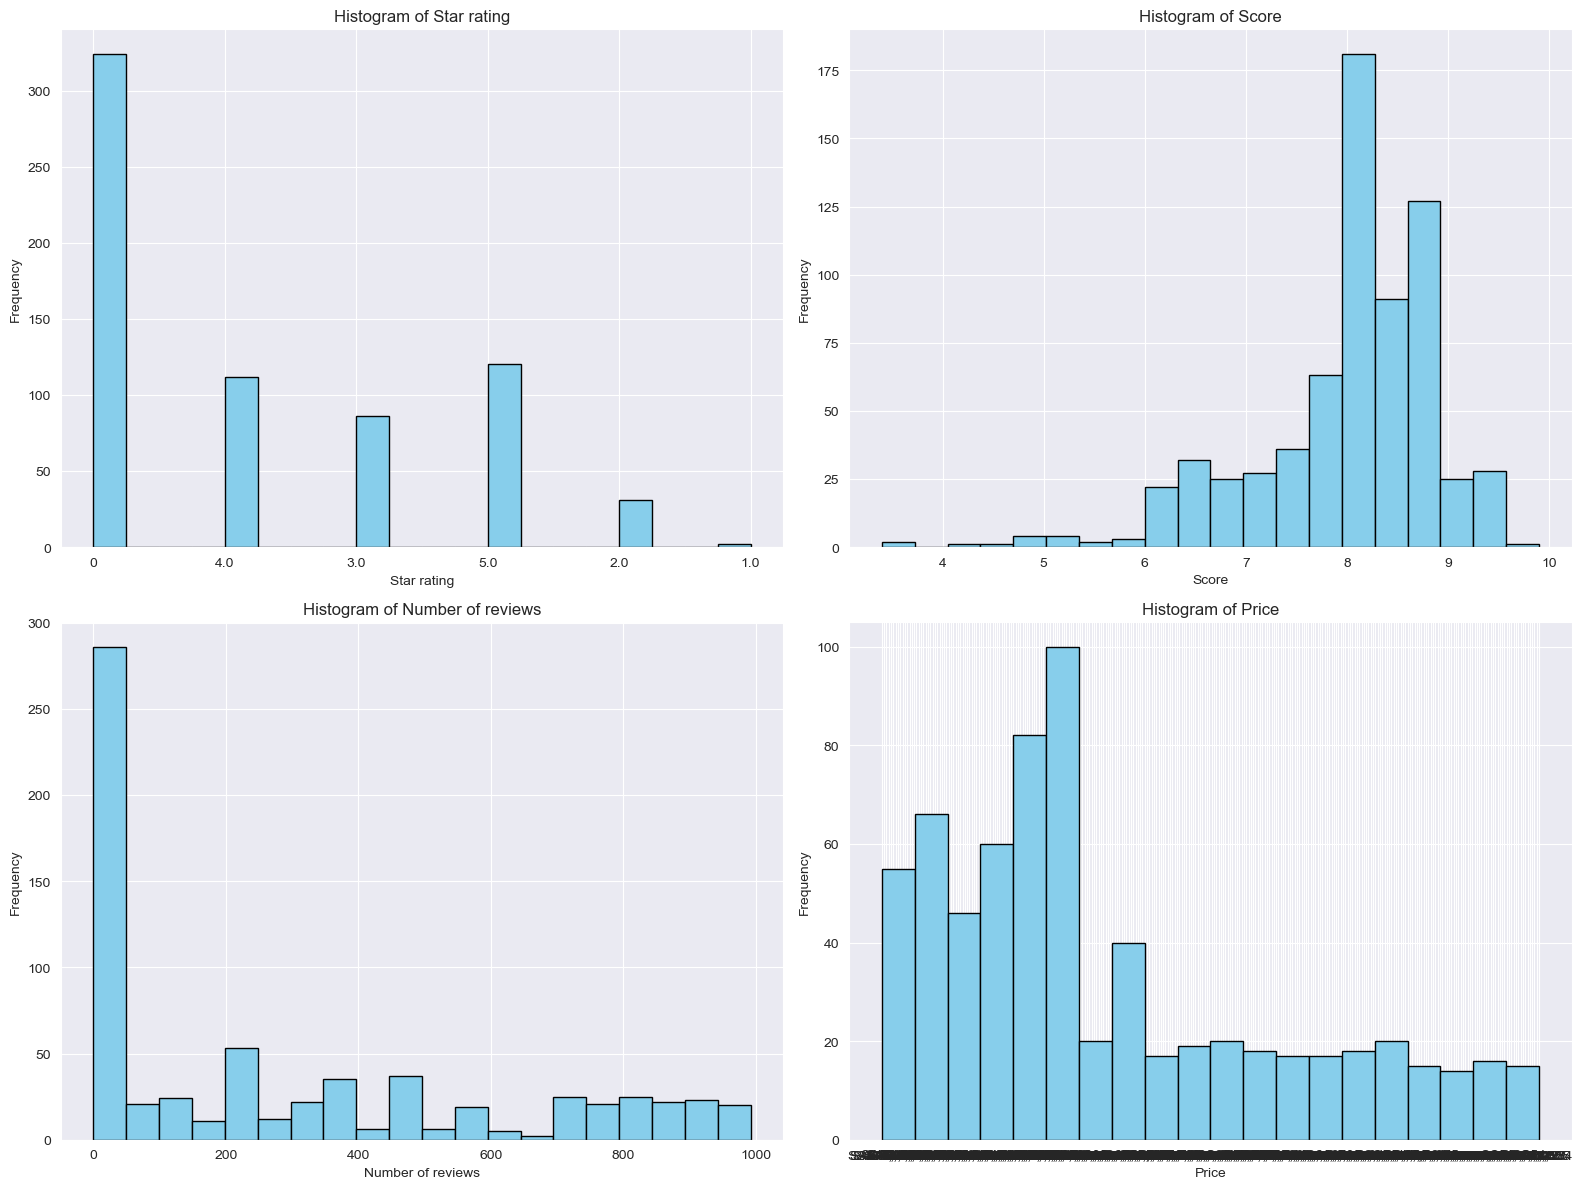

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Read the CSV file into a DataFrame
hotels_ksa = pd.read_csv("mod_KSA_hotels.csv", encoding='latin-1')


# Convert 'Star rating' column to string type
df['Star rating'] = df['Star rating'].astype(str)

# Define numerical and categorical variables
numerical_vars = ["Star rating", "Score", "Number of reviews", "Price"]
categorical_vars = ["Room type", "Room view", "Swimming pool", "Restaurant", "Parking", "Wheelchair accessibility"]

# Visualize distributions of numerical variables with histograms
plt.figure(figsize=(16, 12))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


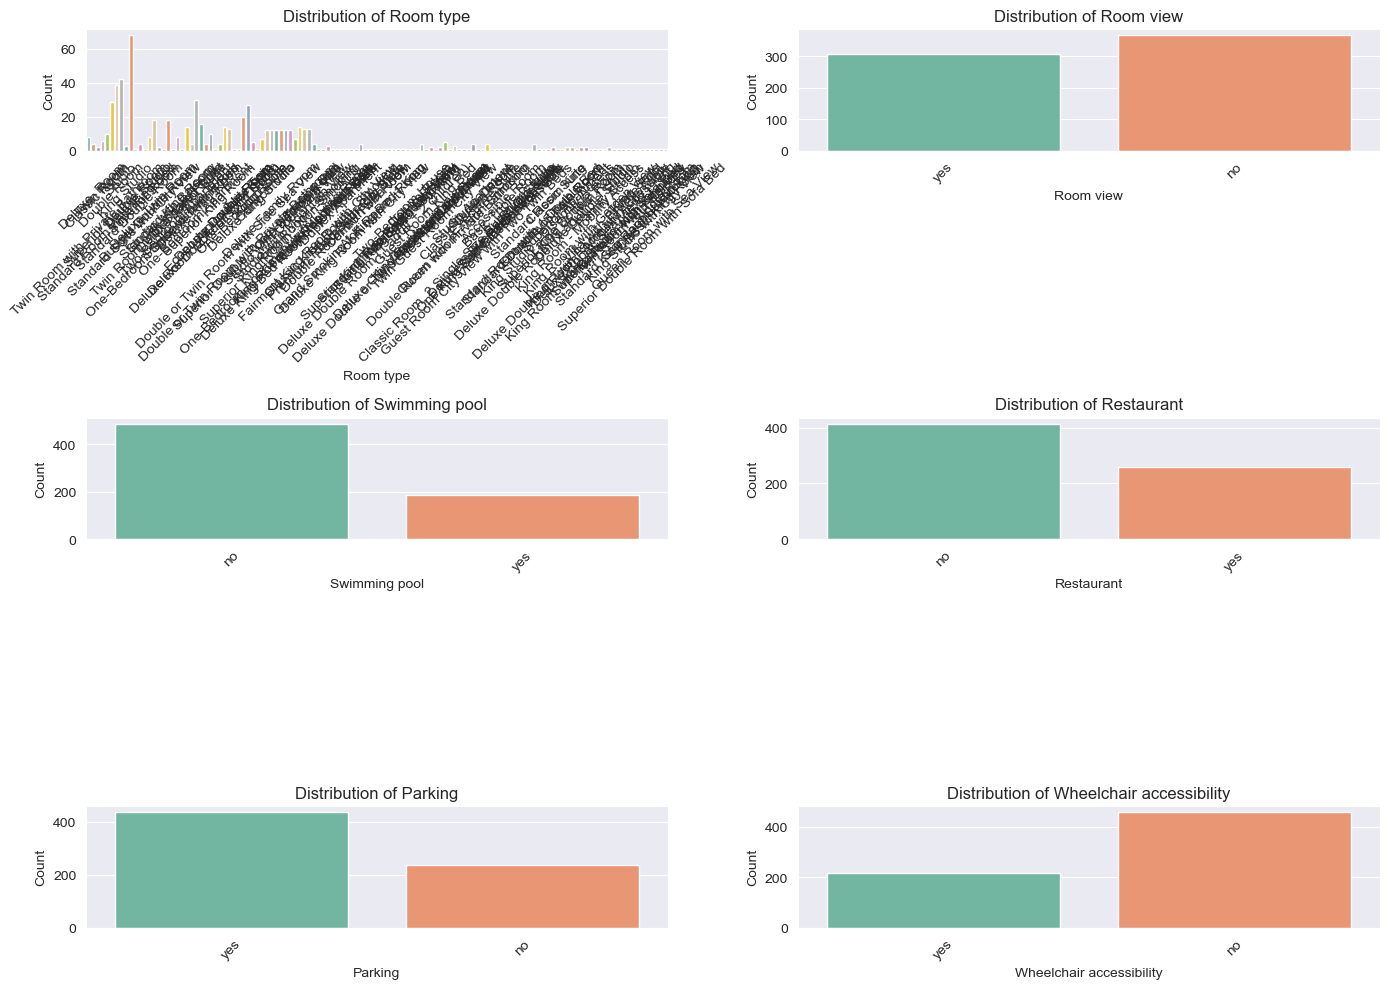

In [24]:
# Generate bar charts to visualize distributions of categorical variables
plt.figure(figsize=(14, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=var, palette='Set2')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [192]:
##task3

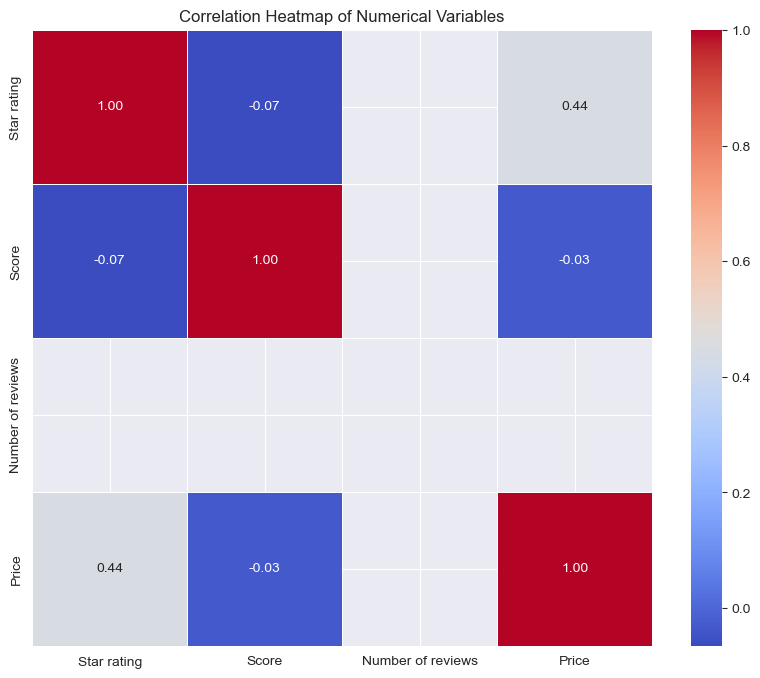

Significant Correlations:
Empty DataFrame
Columns: [Variable 1, Variable 2, Correlation, Absolute Correlation]
Index: []


In [70]:
##task4

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
hotels_ksa = pd.read_csv("mod_KSA_hotels.csv", encoding='latin-1')

# Select numerical variables
numerical_vars = ["Star rating", "Score", "Number of reviews", "Price"]
numerical_data = hotels_ksa[numerical_vars]

# Calculate correlation coefficients
correlation_matrix = numerical_data.corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# Identify significant correlations

#filter only values greater than 0.5 or less than -0.5, excluding values equal to 1.0 (represent correlation of a variable with itself)
significant_correlations = correlation_matrix[((correlation_matrix > 0.5) | (correlation_matrix < -0.5)) & (correlation_matrix != 1.0)].stack().reset_index()

#rename columns of DataFrame to the variables involved in each correlation and the correlation value
significant_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']

#computes absolute value for each pair of variables and adds it as a new column in the DataFrame
significant_correlations['Absolute Correlation'] = significant_correlations['Correlation'].abs()

#sorts the DataFrame by the absolute correlation value in descending order.
significant_correlations = significant_correlations.sort_values(by='Absolute Correlation', ascending=False)

print("Significant Correlations:")
print(significant_correlations)

In [67]:
##Detect outliers using IQR method

import pandas as pd

hotels_ksa = pd.read_csv("mod_KSA_hotels.csv", encoding='utf-8')
hotels_ksa.head()

# Define a function to detect outliers using IQR (Interquartile Range)
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR)]


# Numerical variables in the dataset
numerical_vars = ["Star rating","Score", "Number of reviews", "Price"]

# Detect outliers using IQR method for each numerical variable
outliers_iqr = {}
for var in numerical_vars:
    outliers_iqr[var] = detect_outliers_iqr(hotels_ksa[var])

# Display outliers detected using IQR method
print("\nOutliers detected using IQR method:")
for var, outliers in outliers_iqr.items():
    print(f"{var}: {outliers.tolist()}")




Outliers detected using IQR method:
Star rating: []
Score: [47619047.0, 47619047.0, 47619047.0]
Number of reviews: []
Price: [4872, 3861, 5375, 3800, 7934, 4388, 4400, 7934, 4222, 4400, 4448, 6503, 5639, 4250, 5432, 4950, 7844, 4000, 4055, 4400, 6300, 4550, 4500, 5000, 4224, 3875, 4874, 5643, 7844, 4000, 4222, 4400, 4334, 7844, 4388, 4400, 7844, 4000, 4055, 4400, 7844, 4388, 4400, 7338, 4000, 4055, 4400, 4665, 5325, 7844, 4000, 4055, 4400, 7934, 4000, 4388, 4400, 7673, 4000, 4388, 4400, 7196, 7196, 13295, 6000, 3805, 4752, 4420, 5495, 3745, 3792, 4373, 11688, 5750, 7641, 5000, 7338, 4000, 4055, 4400]


In [68]:
##Detect outliers using Z-SCORE method
import pandas as pd
import numpy as np

# Load your dataset
hotels_ksa = pd.read_csv("mod_KSA_hotels.csv", encoding='utf-8')

# Define a function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    return data[abs(z_scores) > threshold]

# Numerical variables in the dataset
numerical_vars = ["Star rating","Score", "Number of reviews", "Price"]

# Detect outliers using Z-score method for each numerical variable
outliers_zscore = {}
for var in numerical_vars:
    outliers_zscore[var] = detect_outliers_zscore(hotels_ksa[var])

# Display outliers detected using Z-score method
print("\nOutliers detected using Z-score method:")
for var, outliers in outliers_zscore.items():
    print(f"{var}: {outliers.tolist()}")



Outliers detected using Z-score method:
Star rating: []
Score: [47619047.0, 47619047.0, 47619047.0]
Number of reviews: []
Price: [7934, 7934, 6503, 7844, 7844, 7844, 7844, 7844, 7338, 7844, 7934, 7673, 7196, 7196, 13295, 11688, 7641, 7338]


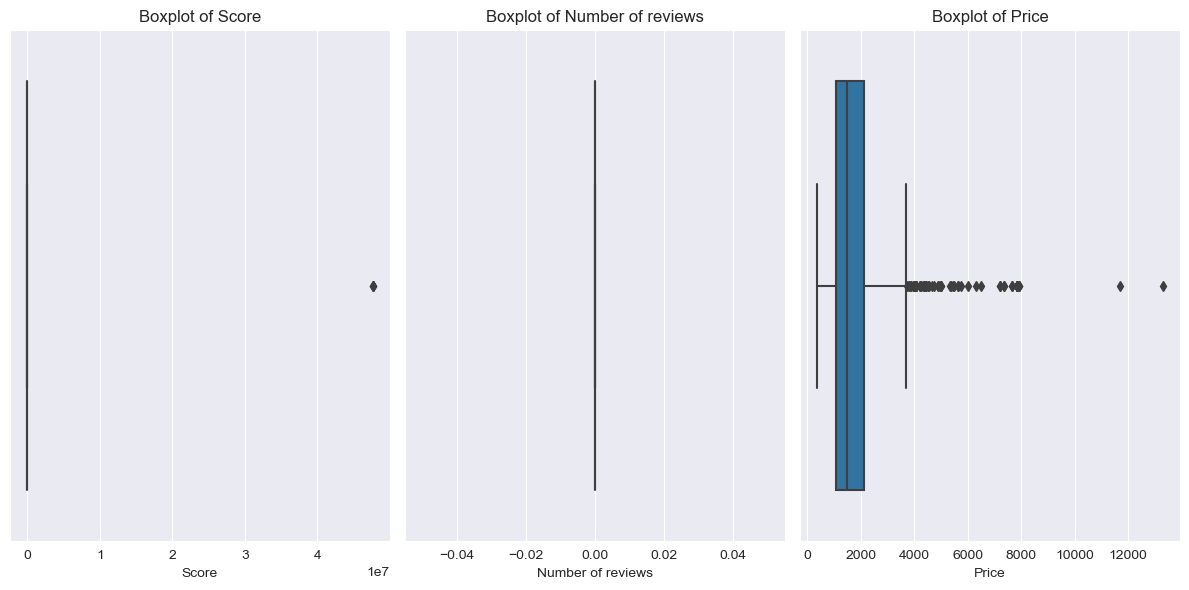

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define numerical variables
numerical_vars = ["Score", "Number of reviews", "Price"]

# Create boxplots for each numerical variable
plt.figure(figsize=(12, 6))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=hotels_ksa[var])
    plt.title(f"Boxplot of {var}")

plt.tight_layout()
plt.show()


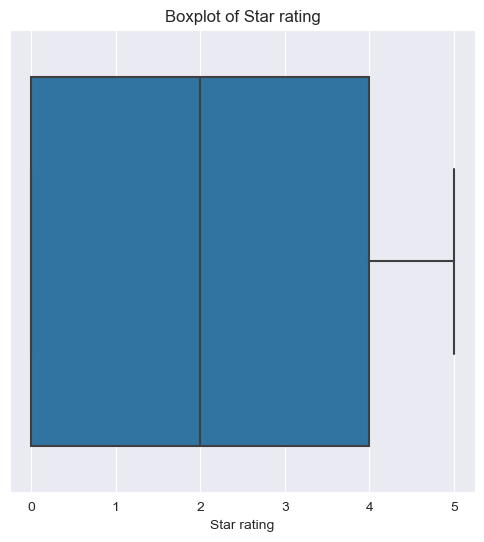

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot for Star rating
plt.figure(figsize=(6, 6))
sns.boxplot(x=hotels_ksa["Star rating"])
plt.title("Boxplot of Star rating")
plt.show()


After using Z-SCORE and IQR methods, we create box plots to visualize the distribution of numerical variables and identify any outliers.

Boxplot of Score: The majority of scores fall within a relatively narrow range, with a few outliers at the higher end.
Boxplot of Number of reviews: The number of reviews is heavily concentrated around the median value, it's shows there is no outlier.
Boxplot of Price: The price distribution is wide, indicating significant variability in prices, with numerous outliers observed at higher price points. This suggests that the hotel offers a diverse range of prices.
Boxplot of Star rating: The distribution of star ratings appears to be relatively uniform, with no apparent outliers.